# Pandas
Na dnešním workshopu se budeme věnovat pythonímu balíčku Pandas. Cílem tohoto balíčku je poskytnutí takových datových struktur, které dovolí rychlou a snadnou práci s tabulkoidními daty, které najdeme v excelovských worksheetech anebo ve výsledcích SQL dotazů.
Na minulém workshopu jsme pracovali s konzolí a s Notepadem++, se kterým jsme editovaly py soubor. Pro dnešek bude náš hlavní pracoví nástroj Jupyter notebook. Jelikož se s tím někteří z Vás ještě nemuseli setkat, bude na workshopu *velice* krátké seznámení s ním.
### Obsah
[Řuční vytváření a základní operace](#Ruční-vytváření-a-základní-operace)  
[Manipulace se sloupci dataframu](#Manipulace-se-sloupci-dataframu)  
[Manipulace s řádky dataframu](#Manipulace-s-řádky-dataframu)  
[SQL dotazy v Pandas](#SQL-dotazy-v-Pandas)  
[Čtení a zápis](#Čtení-a-zápis)  
[Vizualizace](#Vizualizace) 

### Ruční vytváření a základní operace
Ruční vytváření pandích tabulek - DataFramů - asi není ta nejčastější operace, kterou člověk s balíčkem Pandas provádí. Nicméně svoje místo to má, zejména při psaní testů.
Nejprve je třeba pandí balíček importovat. Zažila se zvyklost, že se na import vypustí alias pd, aby nebyl kód zbytečně nafukován přeci jen delším názvem balíčku. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Balíček Pandas obsahuje dva základní datové typy - Series ala 1D strukturu (představte si pod tím třeba sloupec tabulky) a DataFrame ala 2D strukturu složenou právě z objektů typu Series. Jelikož čas tohoto workshopu je omezen, budeme se primárně věnovat druhému jmenovanému. 
Vytvoření prázdného dataframu není zrovna náročné:

In [52]:
prazdny_dataframe = pd.DataFrame()
prazdny_dataframe

""


Pakliže chceme vytvořit dataframe již naplněný daty, musíme do konstrukturu vložit slovník, kde klíči jsou stringy - názvy sloupců a hodnotami jsou listy obsahující hodnoty v daném sloupci. Jednotlivé sloupce mohou mít různé datové typy. Musí mít ale stejnou délku, jinak Vás čeká setkání s ValueError.

In [53]:
jenom_integery = [1,2,3,4,155]
jenom_stringy = ["jedna", "dva", "tři", "čtyři", "pět"]
vsechno_mozne = [1,2, "hodně", "málo", 1.23]
naplneny_dataframe = pd.DataFrame({"cela cisla": jenom_integery, "stringy": jenom_stringy, "smes": vsechno_mozne})
naplneny_dataframe

,cela cisla,stringy,smes
0,1,jedna,1
1,2,dva,2
2,3,tři,hodně
3,4,čtyři,málo
4,155,pět,1.23


Co s takovýmto DataFramem můžeme dělat? Lze na něj kupříkladu vypustit funkce, které nám o něm poskytnou obecné informace. 
Funkce info nám řekne, kolik má dataframe řádků (5) a jaké mají řádky indexy (0 až 4). Dále nám sdělí, jaký je datový typ příslušného sloupce. Pokud jsou v celém sloupci integery, spatříme int64, pokud máme datové typy smíchané, bude typem sloupce object. To samé uvidíme i u sloupce plného stringů. Pokud u sloupce, který měl obsahovat čísla, uvidíte object, značí to problém. Typická je záměna desetinné tečky za desetinnou čárku. Podobná věc často nastává i u fakticky datumových sloupců, které ale nebyly na datumový typ převedeny.

In [54]:
naplneny_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cela cisla  5 non-null      int64 
 1   stringy     5 non-null      object
 2   smes        5 non-null      object
dtypes: int64(1), object(2)
memory usage: 248.0+ bytes


Funkce info nám sice řekne, jak je dataframe velký, tuto informaci ale obklopuje hromada textu. Neexistovala by jiná cesta, jak tento údaj získat bez zbytečného balastu okolo?
První možností je shape. Zde by se slušelo zdůraznit, že v tomto případě se nejedná o funkci, ale o parametr objektu. Ten má konkrétně formu tuplu o dvou prvcích, z nichž první představuje počet řádků a druhý počet sloupců.

In [55]:
naplneny_dataframe.shape

(5, 3)

Samozřejmě je pro pandí dataframe definovaná i funkce len. Ta vrací jedno číslo - počet řádků.

In [56]:
len(naplneny_dataframe)

5

Druhou dataframy obecně popisující funkcí je describe. Ta pro číselné sloupce ukazuje věci typu maximum, medián  či průměr. Pro smíšené sloupce či sloupce se stringy nám funkce poskytne informace o počtu hondot, o počtu unikátních hodnot a ukáže nám též nejčastější se vyskytující prvek i s počtem jeho výskytů.
Bacha - pokud tuto funkci u dataframu s různými typy sloupců zavoláme bez parametru, objeví se před námi shrnutí pouze jednoho typu sloupců. Pokud chceme vidět vše najednou, musíme použít parametr include, kterému je přiřazena hodnota "all".

In [57]:
naplneny_dataframe.describe(include="all")

,cela cisla,stringy,smes
count,5.000000,5,5
unique,NaN,5,5
top,NaN,jedna,málo
freq,NaN,1,1
mean,33.000000,NaN,NaN
std,68.209237,NaN,NaN
min,1.000000,NaN,NaN
25%,2.000000,NaN,NaN
50%,3.000000,NaN,NaN
75%,4.000000,NaN,NaN


### Manipulace se sloupci dataframu
Pokud chceme vybrat jeden sloupec dataframu, vložíme jeho název do hranatých uvozovek, které následují po jménu dotčeného dataframu. Bacha - takto získame 1D Series objekt, nikoli 2D objekt DataFrame.

In [58]:
naplneny_dataframe["cela cisla"]

0      1
1      2
2      3
3      4
4    155
Name: cela cisla, dtype: int64

Alternativně lze psát (pakliže v názvu sloupce není mezera)

In [59]:
naplneny_dataframe.stringy

0    jedna
1      dva
2      tři
3    čtyři
4      pět
Name: stringy, dtype: object

Člověk by si mohl myslet, že pro zobrazení více sloupců stačí psát jména těchto sloupců za sebe oddělené čárkami. Takto jednoduché to ale není:

In [60]:
naplneny_dataframe["cela cisla", "stringy"]

KeyError: ('cela cisla', 'stringy')

V případě, kdy počet vybíraných sloupců přesáhne jedna, je nutné se dataframu předávat jako list, tj. seznam jmen musí být obklopen dvojicí hranatých závorek. To má mimo jiné za následek, že je vracen DataFrame a ne Series.

In [61]:
naplneny_dataframe[["cela cisla", "stringy"]]

,cela cisla,stringy
0,1,jedna
1,2,dva
2,3,tři
3,4,čtyři
4,155,pět


Pakliže chceme přidat sloupec:

In [62]:
naplneny_dataframe["jednicky"] = 1
naplneny_dataframe["spojeni_sloupcu"] = naplneny_dataframe["stringy"] + " " + naplneny_dataframe["stringy"]
naplneny_dataframe

,cela cisla,stringy,smes,jednicky,spojeni_sloupcu
0,1,jedna,1,1,jedna jedna
1,2,dva,2,1,dva dva
2,3,tři,hodně,1,tři tři
3,4,čtyři,málo,1,čtyři čtyři
4,155,pět,1.23,1,pět pět


Pro smazání sloupců se použije funkce *drop*. Jelikož ta dokáže smazat i řádky, musí se jí kromě názvu sloupce předat parametr axis. Ten má pro mazání sloupců hodnotu 1, pro mazání řádků hodnotu 0. Bacha - pakliže se do parametrů dropu nevloží inplace=True, tak se operace neprovede na původním dataframu. Namísto toho se vyrobí dataframe nový, který je funkcí drop vrácen.

In [63]:
naplneny_dataframe = naplneny_dataframe.drop(labels="jednicky", axis=1)
naplneny_dataframe

,cela cisla,stringy,smes,spojeni_sloupcu
0,1,jedna,1,jedna jedna
1,2,dva,2,dva dva
2,3,tři,hodně,tři tři
3,4,čtyři,málo,čtyři čtyři
4,155,pět,1.23,pět pět


Pakliže chceme přidat sloupec na jiné než poslední místo, použije se funkce *insert*. Ta přebírá tři parametry. Prvním je index vkládaného sloupce (pokud má být sloupec první, musí být index roven nule). Druhým parametrem je jméno sloupce, třetím jsou pak hodnoty, které sloupec obsahuje. Je potřeba poznamenat, že narozdíl od dropu *insert* funguje **pouze** v modu úpravy stávajícího objektu.

In [64]:
naplneny_dataframe.insert(3, "stringy_podruhe", naplneny_dataframe["stringy"])
naplneny_dataframe

,cela cisla,stringy,smes,stringy_podruhe,spojeni_sloupcu
0,1,jedna,1,jedna,jedna jedna
1,2,dva,2,dva,dva dva
2,3,tři,hodně,tři,tři tři
3,4,čtyři,málo,čtyři,čtyři čtyři
4,155,pět,1.23,pět,pět pět


Pokud už jsme ale sloupec na konec dataframu vložili a nyní sloupce potřebujeme přeuspořádat, lze použít například funkci reindex:

In [65]:
naplneny_dataframe = naplneny_dataframe.reindex(columns=["cela cisla","stringy", "stringy_podruhe", "spojeni_sloupcu", "smes"])
naplneny_dataframe

,cela cisla,stringy,stringy_podruhe,spojeni_sloupcu,smes
0,1,jedna,jedna,jedna jedna,1
1,2,dva,dva,dva dva,2
2,3,tři,tři,tři tři,hodně
3,4,čtyři,čtyři,čtyři čtyři,málo
4,155,pět,pět,pět pět,1.23


Anebo obyčejný výběr všech sloupců:

In [66]:
naplneny_dataframe = naplneny_dataframe[["stringy", "stringy_podruhe", "spojeni_sloupcu", "cela cisla", "smes"]]
naplneny_dataframe

,stringy,stringy_podruhe,spojeni_sloupcu,cela cisla,smes
0,jedna,jedna,jedna jedna,1,1
1,dva,dva,dva dva,2,2
2,tři,tři,tři tři,3,hodně
3,čtyři,čtyři,čtyři čtyři,4,málo
4,pět,pět,pět pět,155,1.23


Pokud sloupce nechceme přeuspořádat, ale pouze přejmenovat, postačí použití parametru column. 

In [67]:
naplneny_dataframe.columns

Index(['stringy', 'stringy_podruhe', 'spojeni_sloupcu', 'cela cisla', 'smes'], dtype='object')

Tomu se podhodí list s novými jmény:

In [68]:
naplneny_dataframe.columns = ['stringy', 'stringy_znova', 'spojeni_sloipcu', "cela cisla", "smes"]

### Manipulace s řádky dataframu

Řádky v dataframu jsou určeny svými indexy (= to číslo v "nultém" sloupci dataframu). Když chceme získat dejme tomu druhý řádek, aplikuje funkci iloc následujícím způsobem:

In [69]:
naplneny_dataframe.iloc[1]

stringy                dva
stringy_znova          dva
spojeni_sloipcu    dva dva
cela cisla               2
smes                     2
Name: 1, dtype: object

Nicméně podobně by se dala použít i funkce loc:

In [70]:
naplneny_dataframe.loc[1]

stringy                dva
stringy_znova          dva
spojeni_sloipcu    dva dva
cela cisla               2
smes                     2
Name: 1, dtype: object

Jaký je mezi nimi vlastně rozdíl? Funkce iloc vždy hledí na index řádku (de facto pořadové číslo), zatímco loc kouká na label řádku. Defaultně jsou labely stejné jako indexy a obě funkce tedy vrací to samé. Změňme nyní ale labely indexů:

In [71]:
#aktualni indexy
print(naplneny_dataframe.index)
#prejmenovani
naplneny_dataframe.index = ["prvni", "druhy", "treti", "ctvrty", "paty"]
#zkontrolovani, ze jsou indexy jine
print(naplneny_dataframe.index)
#A zkontrolovani, ze dataframe vypada tak, jak bychom ocekavali
naplneny_dataframe

RangeIndex(start=0, stop=5, step=1)
Index(['prvni', 'druhy', 'treti', 'ctvrty', 'paty'], dtype='object')


,stringy,stringy_znova,spojeni_sloipcu,cela cisla,smes
prvni,jedna,jedna,jedna jedna,1,1
druhy,dva,dva,dva dva,2,2
treti,tři,tři,tři tři,3,hodně
ctvrty,čtyři,čtyři,čtyři čtyři,4,málo
paty,pět,pět,pět pět,155,1.23


Nyní použití iloc a loc zopakujeme. Funkce iloc vrací pořád to samé:

In [72]:
naplneny_dataframe.iloc[1]

stringy                dva
stringy_znova          dva
spojeni_sloipcu    dva dva
cela cisla               2
smes                     2
Name: druhy, dtype: object

Použití funkce loc mající v hranatých závorkách 1 ale vede k chybě:

In [73]:
naplneny_dataframe.loc[1]

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [1] of <class 'int'>

Jakmile je ale v hranatých závorkách label indexu, už zase loc funguje.

In [74]:
naplneny_dataframe.loc["druhy"]

stringy                dva
stringy_znova          dva
spojeni_sloipcu    dva dva
cela cisla               2
smes                     2
Name: druhy, dtype: object

Řádky smažeme podobně jako sloupce pomocí funkce drop - jako axis je tentokrát nula:

In [75]:
naplneny_dataframe = naplneny_dataframe.drop(["ctvrty", "paty"], axis=0)
naplneny_dataframe

,stringy,stringy_znova,spojeni_sloipcu,cela cisla,smes
prvni,jedna,jedna,jedna jedna,1,1
druhy,dva,dva,dva dva,2,2
treti,tři,tři,tři tři,3,hodně


Na sloučení více dataframů (anebo na přidání řádky na konec dataframu) se používá funkce concat. Ta jako parametr bere list spojovaných dataframů (v případě přidávání řádky si člověk musí vytvoři minidataframe obsahující pouze ji).
Pandas mají funkci append, která mi podle dokumentace přijde extrémně podobná concatu. Strýčet Google tuhle domněnku potvrzuje s tím, že concat je obvykle stejně rychlé, v jistých případech i rychlejší.

In [76]:
slozenina = pd.concat([naplneny_dataframe, naplneny_dataframe])
slozenina

,stringy,stringy_znova,spojeni_sloipcu,cela cisla,smes
prvni,jedna,jedna,jedna jedna,1,1
druhy,dva,dva,dva dva,2,2
treti,tři,tři,tři tři,3,hodně
prvni,jedna,jedna,jedna jedna,1,1
druhy,dva,dva,dva dva,2,2
treti,tři,tři,tři tři,3,hodně


Vidíme, že nyní loc vrací dva řádky

In [77]:
slozenina.loc["druhy"]

,stringy,stringy_znova,spojeni_sloipcu,cela cisla,smes
druhy,dva,dva,dva dva,2,2
druhy,dva,dva,dva dva,2,2


Oproti tomu iloc vrací pořád jeden řádek.

In [78]:
naplneny_dataframe.iloc[1]

stringy                dva
stringy_znova          dva
spojeni_sloipcu    dva dva
cela cisla               2
smes                     2
Name: druhy, dtype: object

Z toho je patrné, že olabelované indexy mohou mít odlišné chování než čísla indexů. Nyní záleží na tom, co vlastně potřebujeme. Pokud by nás zdvojení indexů mátlo, resp. pokud by se nám nelíbilo, že indexy jednotlivých sešitých dataframů začínají vždy od nuly, zresetujeme index s pomocí funkce *reset_index*. Ta defaultně "zastaralé" indexy vloží do nového sloupce dataframu. Pokud by se nám to nelíbilo, musíme *reset_index* volat s parametrem *drop=True*.

In [79]:
slozenina = slozenina.reset_index()
slozenina

,index,stringy,stringy_znova,spojeni_sloipcu,cela cisla,smes
0,prvni,jedna,jedna,jedna jedna,1,1
1,druhy,dva,dva,dva dva,2,2
2,treti,tři,tři,tři tři,3,hodně
3,prvni,jedna,jedna,jedna jedna,1,1
4,druhy,dva,dva,dva dva,2,2
5,treti,tři,tři,tři tři,3,hodně


Pokud bychom chtěli aplikovat nějakou funkci na každý řádek dataframu, je klasické for iterování extrémně špatný a extrémně zdlouhavý postup. Správně by se měla použít funkce apply.

In [80]:
slozenina[["stringy"]].apply(lambda x:print(x))

0    jedna
1      dva
2      tři
3    jedna
4      dva
5      tři
Name: stringy, dtype: object


stringy    None
dtype: object

### SQL dotazy v Pandas
Viděli jsme, že Pandas lze využít na manipulaci s tabulkoidní daty. De facto podobnou věc provádíme i v relačních databázích. Existuje nějaký převod mezi SQL dotazy a operacemi s pandími dataframy? Před samotným zkoumáním této otázky si vytvořme dataframy, se kterými budeme v tomto odstavci pracovat.

In [3]:
osoby = pd.DataFrame({
    "id" : [100,200,300,400,500],
    "krestni_jmeno" : ["Victor", "Mary", "Johann", "Albert", "William"],
    "prijmeni" : ["Hugo", "Shelly", "Geothe", "Camus", "Shakespear"],
    "vek" : [25,30,75,None,38],
    "pohlavi" : ["M", "F", "M", "M", "M"]
})
osoby

,id,krestni_jmeno,prijmeni,vek,pohlavi
0,100,Victor,Hugo,25.0,M
1,200,Mary,Shelly,30.0,F
2,300,Johann,Geothe,75.0,M
3,400,Albert,Camus,NaN,M
4,500,William,Shakespear,38.0,M


In [15]:
prodane_knihy = pd.DataFrame({
    "id" : [100,200,300,400],
    "pocet_knih" : [19,25,12,31]
})
prodane_knihy

,id,pocet_knih
0,100,19
1,200,25
2,300,12
3,400,31


Nejprve se podívejme na klasický select
```sql
select krestni_jmeno, prijmeni, vek from osoby;
```
Ten s pomocí pand zrealizujeme jako

In [4]:
osoby[["krestni_jmeno", "prijmeni", "vek"]]

,krestni_jmeno,prijmeni,vek
0,Victor,Hugo,25.0
1,Mary,Shelly,30.0
2,Johann,Geothe,75.0
3,Albert,Camus,NaN
4,William,Shakespear,38.0


Co kdybychom ale chtěli jen dvě řádky?
```sql
select top 2 krestni_jmeno, prijmeni, vek from osoby;
```

In [5]:
osoby[["krestni_jmeno", "prijmeni", "vek"]].head(2)

,krestni_jmeno,prijmeni,vek
0,Victor,Hugo,25.0
1,Mary,Shelly,30.0


Pro *WHERE* podmínku napíšeme 
```sql
select * from osoby where prijmeni = 'Geothe';
```

In [6]:
osoby[osoby["prijmeni"]=="Geothe"]

,id,krestni_jmeno,prijmeni,vek,pohlavi
2,300,Johann,Geothe,75.0,M


Co když ve *WHERE* bude více podmínek? Pro *and* mezi ně vložíme znak *&*, pro *or* znak *|*.
```sql
select * from osoby where prijmeni = 'Geothe' and krestni_jmeno = "Johann";
```

In [7]:
osoby[(osoby["prijmeni"]=="Geothe") & (osoby["krestni_jmeno"]=="Johann")]

,id,krestni_jmeno,prijmeni,vek,pohlavi
2,300,Johann,Geothe,75.0,M


A co když chceme jednak omezení na sloupce a jednak omezení na řádky?
```sql
select id from osoby where prijmeni = 'Geothe' and krestni_jmeno = "Johann";
```

In [8]:
osoby[["id"]][(osoby["prijmeni"]=="Geothe") & (osoby["krestni_jmeno"]=="Johann")]

,id
2,300


Jak bychom ale v pandách ošetřili přítomnost NULLu (v Pythonu None)?
```sql
select * osoby where vek is NULL;
```

In [9]:
osoby[osoby["vek"].isna()]

,id,krestni_jmeno,prijmeni,vek,pohlavi
3,400,Albert,Camus,NaN,M


Variací na like je funkce str.contains.
```sql
select * osoby where prijmeni like '%eoth%';

```

In [10]:
osoby[osoby["prijmeni"].str.contains("eoth")]

,id,krestni_jmeno,prijmeni,vek,pohlavi
2,300,Johann,Geothe,75.0,M


Pro emulaci *not like* se musí na začátek prvních hranatých závorek umístit vlnovka, která vede k negaci následné podmínky.

In [11]:
osoby[~osoby["prijmeni"].str.contains("eoth")]

,id,krestni_jmeno,prijmeni,vek,pohlavi
0,100,Victor,Hugo,25.0,M
1,200,Mary,Shelly,30.0,F
3,400,Albert,Camus,NaN,M
4,500,William,Shakespear,38.0,M


Občas je též potřeba data podle hodnoty nějakého sloupce setřídit
```sql
select * osoby order by vek desc;
```

In [12]:
osoby.sort_values(["vek"], ascending=False)

,id,krestni_jmeno,prijmeni,vek,pohlavi
2,300,Johann,Geothe,75.0,M
4,500,William,Shakespear,38.0,M
1,200,Mary,Shelly,30.0,F
0,100,Victor,Hugo,25.0,M
3,400,Albert,Camus,NaN,M


Jak realizovat agregace a count? Použijeme funkci size - oproti pythonímu countu nepovede k nadbytečnému opakování týchž hodnot pro každý sloupec.
```sql
select pohlavi, count(*) from osoby group by pohlavi;
```

In [92]:
osoby.groupby("pohlavi").size()

pohlavi
F    1
M    4
dtype: int64

In [13]:
osoby.groupby("pohlavi").count()

,id,krestni_jmeno,prijmeni,vek
pohlavi,,,,
F,1,1,1,1
M,4,4,4,3


Co když ale budeme mít agregačních funkcí více? Použijeme funkci agg. Ta jako parametr bere parametry v podobě jmeno_sloupce_v_agregovane_tabulce=("jmeno_sloupce_ve_stare_tabulce", agregacni_funkce)
```sql
select pohlavi, count(*), avg(vek) from osoby group by pohlavi;
```

In [94]:
osoby.groupby("pohlavi").agg(prumerny_vek=("vek", np.mean), pocet=("pohlavi",np.size))

,prumerny_vek,pocet
pohlavi,,
F,30.0,1
M,46.0,4


Pozn.: Pokud Vám výše uvedený příkaz nefunguje, asi je verze Vašeho balíčku Pandas 0.24 nebo nižší. Pokud nechcete provést upgrade, musíte pro použití více agregačních funkcí psát

In [95]:
osoby.groupby("pohlavi").agg({"vek":np.mean, "pohlavi":np.size})

,vek,pohlavi
pohlavi,,
F,30.0,1
M,46.0,4


Jak na sebe dataframy joinovat?
```sql
select * 
from 
 osoby os1 
inner join 
 prodane_knihy pk1 
   on os1.id = pk1.id;
```


In [14]:
pd.merge(osoby, prodane_knihy, on="id")

NameError: name 'prodane_knihy' is not defined

Pokud chceme udělat left, right či outer full join, přidáme do funkce parametr how s hodnotami "left'", "right" či "outer". Pokud se jména joinovacích sloupců v napojovaných tabulkách liší, nepoužijeme parametr *on*, ale *left_on* a *right_on*. Nakonec pokud joinujeme přes více sloupců, předáváme jména těchto sloupců v listu.

In [16]:
pd.merge(osoby, prodane_knihy, left_on=["id"], right_on=["id"], how='outer')

,id,krestni_jmeno,prijmeni,vek,pohlavi,pocet_knih
0,100,Victor,Hugo,25.0,M,19.0
1,200,Mary,Shelly,30.0,F,25.0
2,300,Johann,Geothe,75.0,M,12.0
3,400,Albert,Camus,NaN,M,31.0
4,500,William,Shakespear,38.0,M,NaN


Pro *union all* se použije jednoduchý concat.
```sql
select * from osoby 
union all
select * from osoby;
```

In [17]:
pd.concat([osoby, osoby])

,id,krestni_jmeno,prijmeni,vek,pohlavi
0,100,Victor,Hugo,25.0,M
1,200,Mary,Shelly,30.0,F
2,300,Johann,Geothe,75.0,M
3,400,Albert,Camus,NaN,M
4,500,William,Shakespear,38.0,M
0,100,Victor,Hugo,25.0,M
1,200,Mary,Shelly,30.0,F
2,300,Johann,Geothe,75.0,M
3,400,Albert,Camus,NaN,M
4,500,William,Shakespear,38.0,M


Pro klasický union musíme na tento concat ještě aplikovat funkci *drop_duplicates*
```sql
select * from osoby 
union
select * from osoby;
```

In [18]:
pd.concat([osoby, osoby]).drop_duplicates()

,id,krestni_jmeno,prijmeni,vek,pohlavi
0,100,Victor,Hugo,25.0,M
1,200,Mary,Shelly,30.0,F
2,300,Johann,Geothe,75.0,M
3,400,Albert,Camus,NaN,M
4,500,William,Shakespear,38.0,M


### Čtení a zápis
Pro načtení dat z csv souboru použijeme read_csv. Pakliže soubor obsahuje hlavičku na prvním řádku, vložíme k parametrům funkce header=0. Pokud ale hlavička přítomna není, píšeme header=None.
Pozn.: dataset kc_house_data.csv leží volně na internetu, např. na kaggle.com. 
```python
domy = pd.read_csv("kc_house_data.csv", sep=",", header=0)
```

Dataframe uložíme do csv souboru pomocí to_csv. Je rozumné přidat do volání funkce parametr index=False, abychom ve výsledném produktu neměli i obvykle nežádoucí labely indexů řádků.

In [100]:
osoby.to_csv("pokus_osoby.txt", sep=";", index=False)

Podobně by se data četla a zapisovala i do excelovských souborů (read_excel, to_excel). Čtení xml souborů bohužel *Pandas* přímo neumožňuje. Musí se tudíž použít variace na následující kód.
```python
import xml.etree.ElementTree as etree

tree = etree.parse("csfd-90k-reviews-ranlp2013.xml")
root = tree.getroot()
reviews = root.findall(".//review")

name = []
rating = []
text = []
for review in reviews:
    rating.append(review.attrib["origRating"])
    name.append(review.attrib["product"])
    text.append(review.find("./text").text)

review_frame = pd.DataFrame({"name":name, "rating":rating, "text":text})
```

Oproti tomu čtení z databáze se dá zrealizovat pomocí 
```python
dotaz = "select * from nejaka_databaze.nejak_tabulka;"
tabulka = pd.read_sql(dotaz, connection_objekt_do_databaze)
```

### Vizualizace
Pozn.: jako zdroj dat byl mimo jiné použit soubor kc_house_data.csv - lze najít na internetu.
Pandas pro vykreslování obrázků používá matplotlib. Výhoda oproti "čistému" matplotlibu je v jednoduchosti vykreslování více sloupc z jednoho pandího datasetu do jednoho grafu.
Defaultní graf, kterým je čárový graf, dostaneme tak, že za jméno datasetu vložíme tečku a plot().

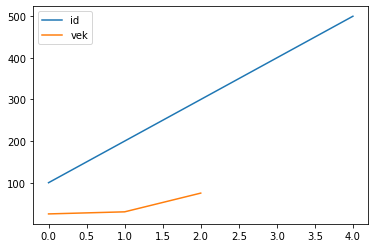

In [101]:
osoby.plot()

In [19]:
osoby.head(2)

,id,krestni_jmeno,prijmeni,vek,pohlavi
0,100,Victor,Hugo,25.0,M
1,200,Mary,Shelly,30.0,F


Vidíme, že byly vykresleny všechny (no všechny - oba) sloupce s numerickými údaji. Automaticky byla do grafu umístěna i legenda. Přerušení čáry odpovídající sloupci *vek* je způsobeno přítomností NaN (not a number). Pokud chceme v takovémto grafu vidět všechny body, přidáme do argumentů plot funkce parametr marker="o"

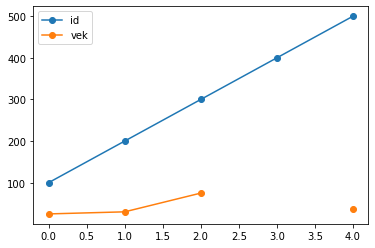

In [103]:
osoby.plot(marker="o")

Pokud chceme vykreslit jiný typ grafu, musí za jménem dataframu následovat plot.typ_grafu. Například scatter graf se vytvoří následujícím příkazem:

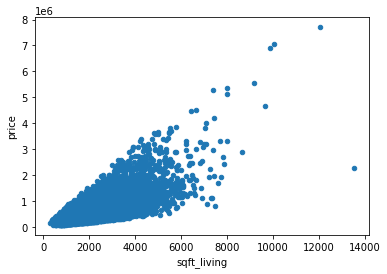

In [104]:
domy.plot.scatter(x="sqft_living", y="price")

Může se stát, že graf bude mít nevyhovující osy x či y. To lze spravit pomocí parametrů xlim resp. ylim.

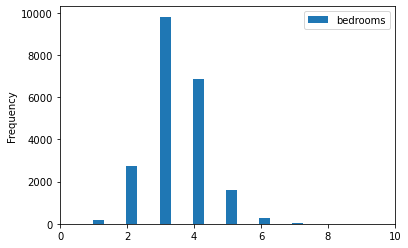

In [105]:
domy[["bedrooms"]].plot.hist(bins=100, xlim=(0,10))

Pro zobrazení více konkrétních sloupců v histogramu napřed provedeme selekci na chtěné sloupce:

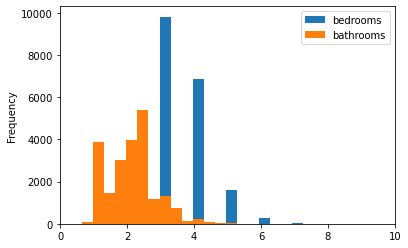

In [106]:
domy[["bedrooms","bathrooms"]].plot.hist(bins=100, xlim=(0,10))

Prakticky totožného výsledku se dá docílit více příkazy. Zde jsou ukázány dva způsoby, jak vytvořit boxplot.

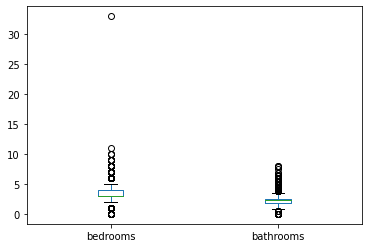

In [107]:
domy[["bedrooms","bathrooms"]].plot.box()

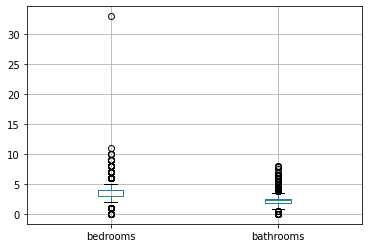

In [108]:
domy[["bedrooms","bathrooms"]].boxplot()

Pakliže chceme vykreslit hodnotu určitého sloupce (zde *price*) pro různé hodnoty sloupce jiného(zde *bathrooms*), použije se následující postup:

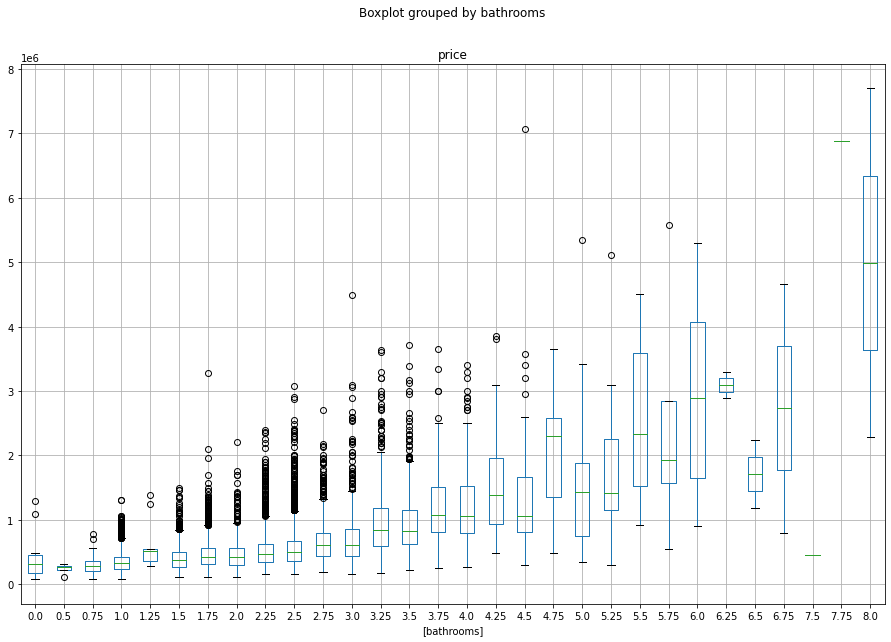

In [109]:
domy.boxplot(column=["price"], by=["bathrooms"], figsize=(15,10))

Pokud chceme graf uložit dejme tomu jako png soubor, musí po řádku vykreslující graf následovat
```python
plt.savefig("nejaky_graf.png")
```
Bacha - oba příkazy musí být ve stejně buňce!

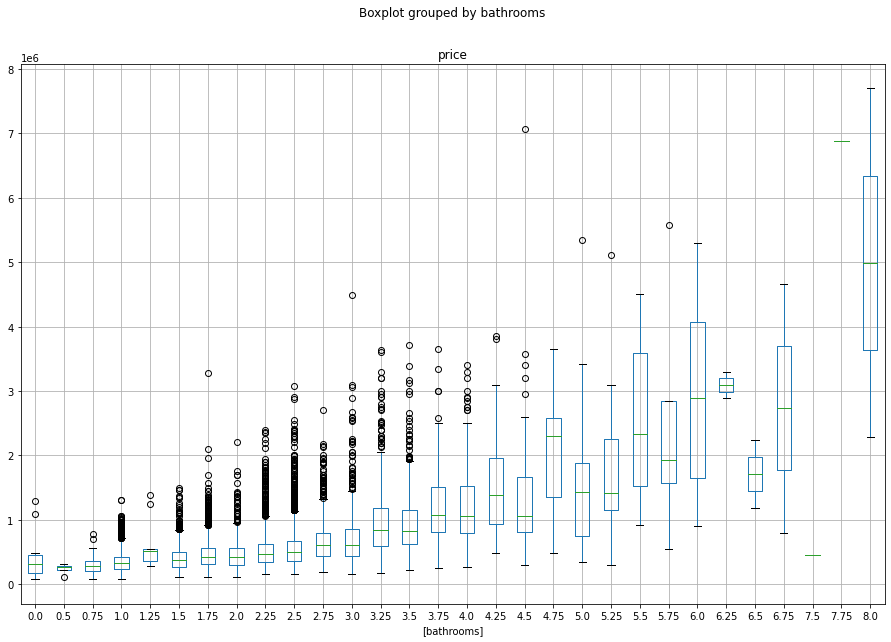

In [110]:
domy.boxplot(column=["price"], by=["bathrooms"], figsize=(15,10))
plt.savefig("nejaky_graf.png")